In [233]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [234]:
file_path = r"data/CleanedMusic.csv"

df = pd.read_csv(file_path)

In [235]:
df.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


---


# K Means Clustering Without Scaling

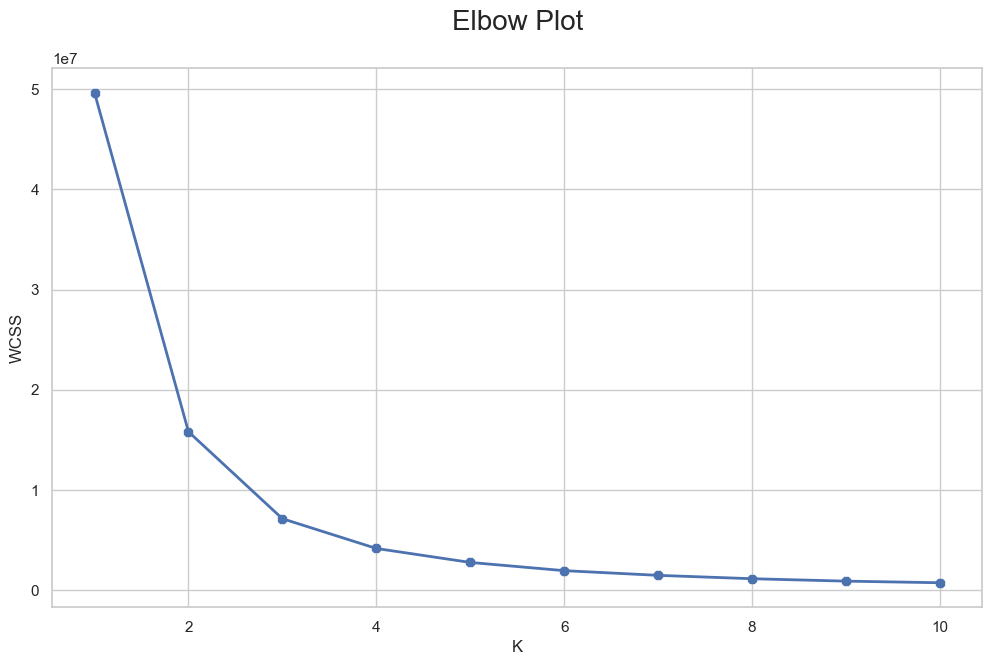

In [307]:
# Create an Elbow plot of WSS (Within-Cluster Sum of Squares)

X1 = df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize= (12,7))

sns.set(style="whitegrid")
plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

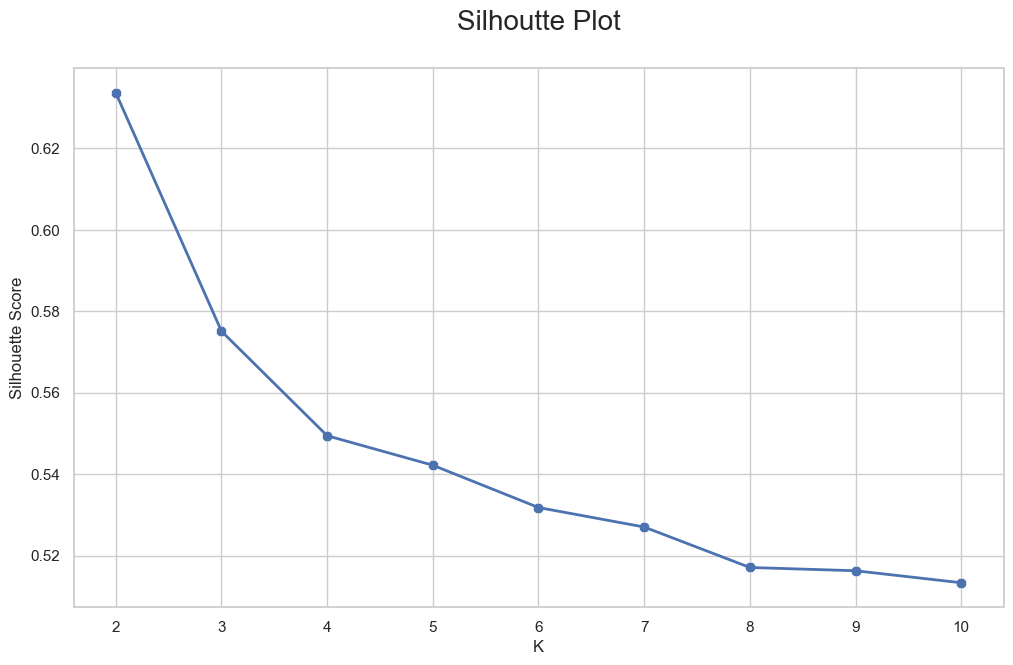

In [237]:
# Now lets create a plot of silhoutte score 


silhouette = []
for k in range(2, 11):
# create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

# We will go with K = 4


In [336]:

kmeans =  KMeans(n_clusters= 4, init = "k-means++" ,n_init= 50,  random_state= 42)

kmeans.fit(X1)

# Initializes a KMeans model with 4 clusters using k-means++ initialization and a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=42)


In [337]:
# Generate labels for the dataset 

labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [338]:
#output the centroids of your clusters 

kmeans.cluster_centers_

array([[2.04270215e-02, 1.47056391e-01, 1.04572781e-01, 5.56767163e-02,
        2.15281611e-02, 1.81005471e-02, 3.10296776e-02, 7.16415553e-02,
        1.24452357e-01, 5.29636816e-02, 5.93765343e-02, 4.63353649e-02,
        2.53211300e-02, 1.04296113e-01, 3.11464827e-02, 3.44542016e-01,
        1.05784855e+02],
       [2.15363385e-02, 9.54333285e-02, 1.40876671e-01, 6.13075408e-02,
        1.36314603e-02, 1.63487401e-02, 7.16464788e-02, 8.23656639e-02,
        4.25134088e-02, 7.05007061e-02, 3.20482314e-02, 5.19630790e-02,
        2.39092427e-02, 1.58888631e-01, 3.29265759e-02, 5.03005918e-01,
        3.53326558e+01],
       [1.78918404e-02, 1.12138592e-01, 7.21925890e-02, 3.68788963e-02,
        2.50139369e-02, 1.63031157e-02, 1.73753154e-02, 6.31760791e-02,
        3.22147609e-01, 3.50270579e-02, 6.75758599e-02, 3.48090305e-02,
        2.29507973e-02, 4.41194345e-02, 2.46066513e-02, 3.03374734e-01,
        1.65540353e+02],
       [2.19893577e-02, 1.28642073e-01, 1.23443873e-01, 6.016

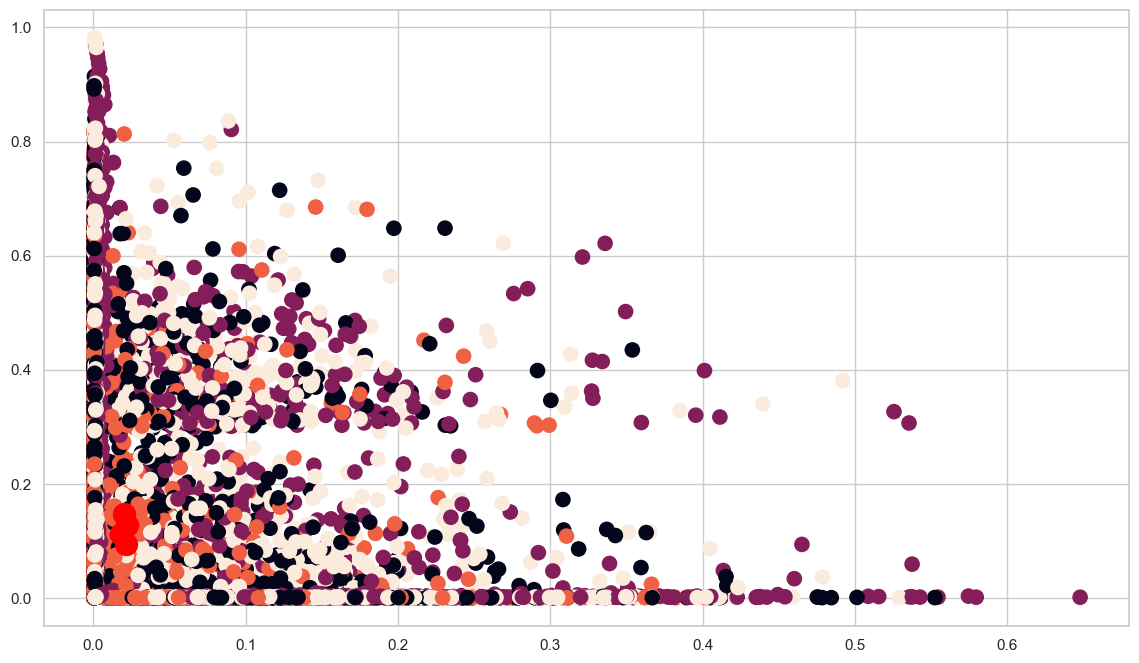

In [339]:
plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)

plt.xlabel('')
plt.ylabel('')
plt.show()

# K means clustering with Scaling 

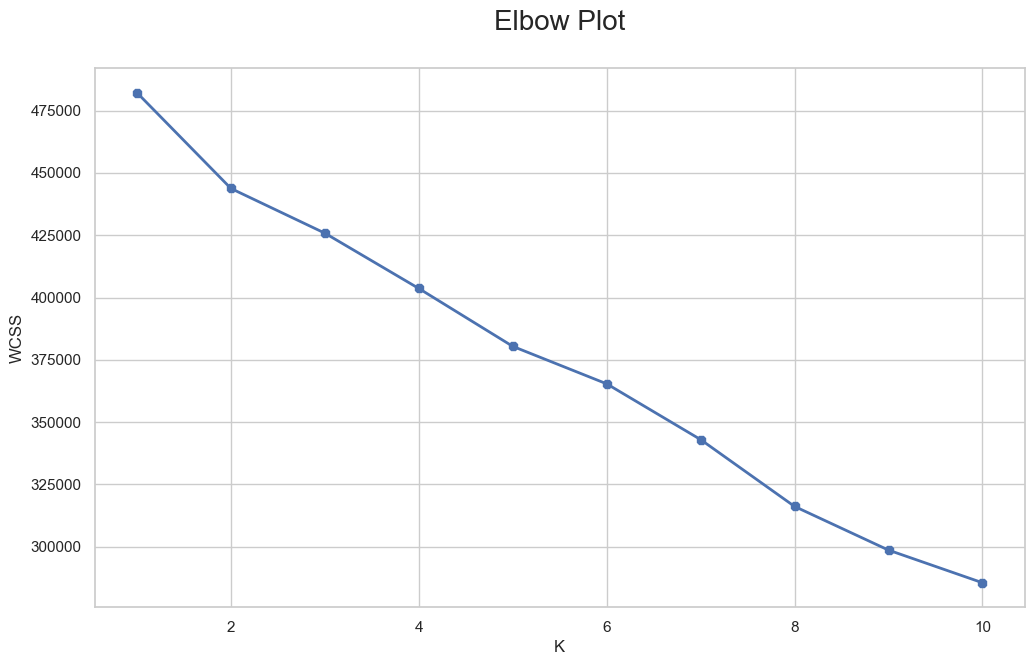

In [340]:
# Create a new KMeans object with 2 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit the Kmens Object
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()




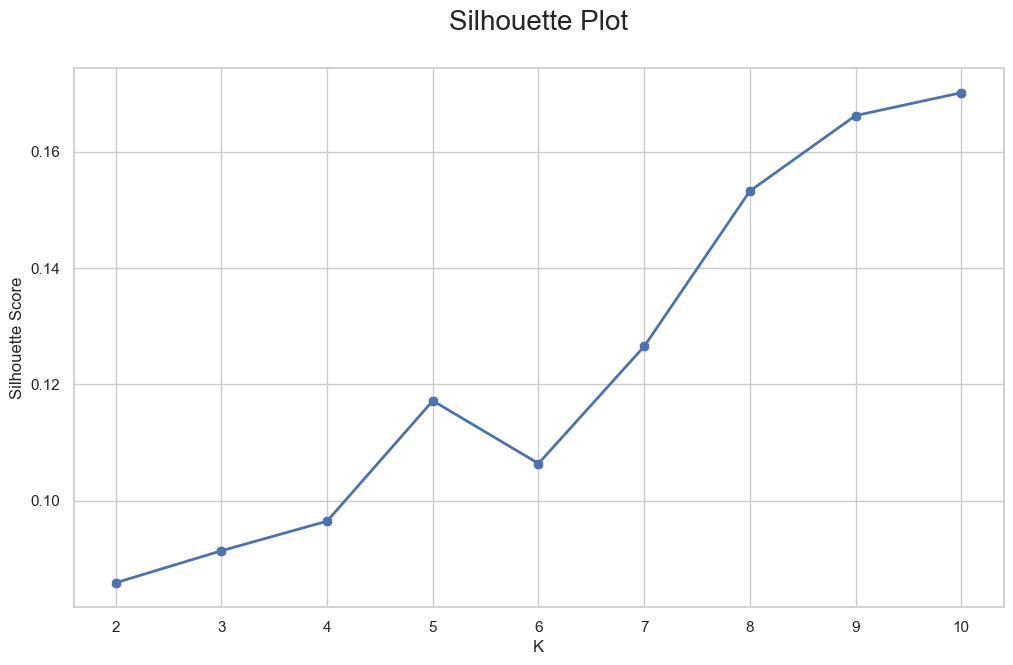

In [341]:
# create a plot of silhoutte score

sil_scaled = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    predictions = kmeans.fit_predict(X1_scaled)
    sil_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), sil_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


# After doing the Elbow and Silhoutte plot for Kmeans with Scaling 
# Will with go with K = 6  

In [335]:
kmeans_scaled = KMeans(n_clusters=6, init="k-means++",n_init=50, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=6, n_init=50, random_state=42)

In [332]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([1, 3, 4, ..., 0, 0, 0], dtype=int32)

In [333]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-5.61549066e-03, -3.66634736e-01, -4.61456127e-01,
        -2.77592656e-01,  2.18718538e-01,  2.23449067e-02,
        -3.23962439e-01, -8.75113276e-02,  1.99172943e+00,
        -3.07988584e-01,  2.33916361e-01, -2.39583751e-01,
        -1.45808086e-01, -5.70205590e-01, -1.69921765e-01,
        -4.49547044e-01,  1.00894898e+00],
       [ 9.03670534e-02, -4.85642192e-01, -4.04514731e-01,
        -2.21884496e-01, -7.31135813e-02, -2.16719862e-02,
         5.95566880e-01,  1.41358743e-01, -4.34723699e-01,
        -2.51893689e-01, -1.50861418e-01,  3.46414233e-02,
        -9.63331217e-02,  1.29631737e+00, -1.15631775e-01,
         2.13023390e-01, -3.57752844e-01],
       [ 2.39560557e-01, -4.53058748e-01, -4.28605307e-01,
         2.24903315e+00,  5.33223196e-02,  1.54575595e-02,
        -1.06784091e-01,  1.46988534e-02, -3.64981325e-01,
        -2.61408287e-01, -4.88606190e-02, -1.03627502e-01,
        -1.52530331e-01, -4.06189904e-01,  1.20599360e+00,
         1.17874181e-01, -1.7

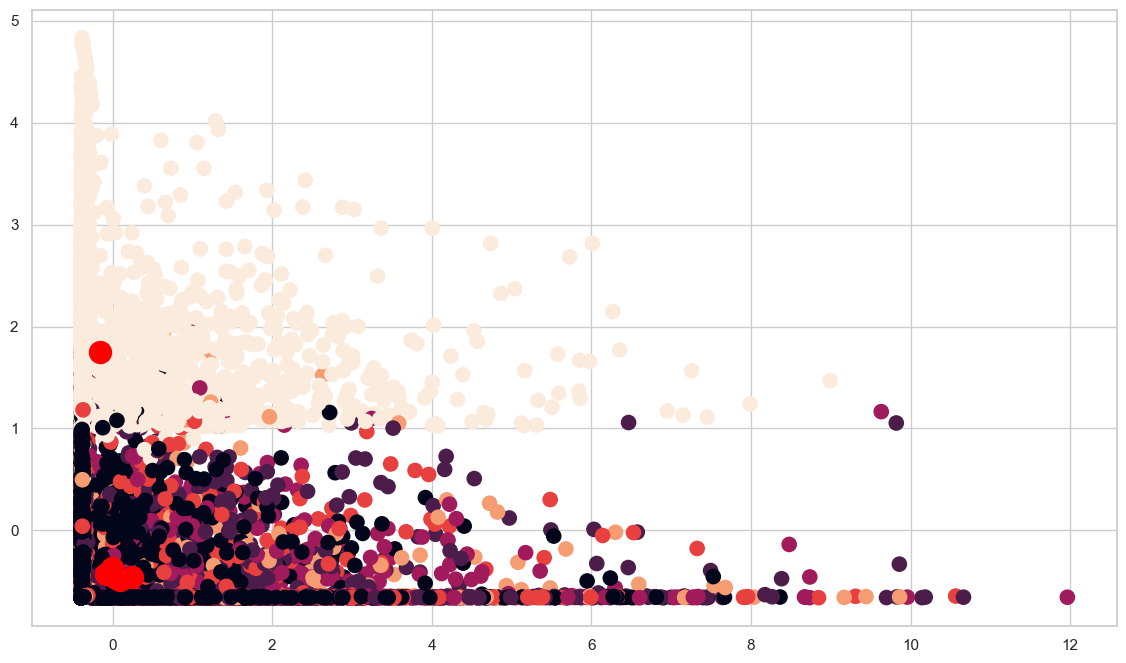

In [334]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Kmeans Clustering with Scaling Visualized with PCA

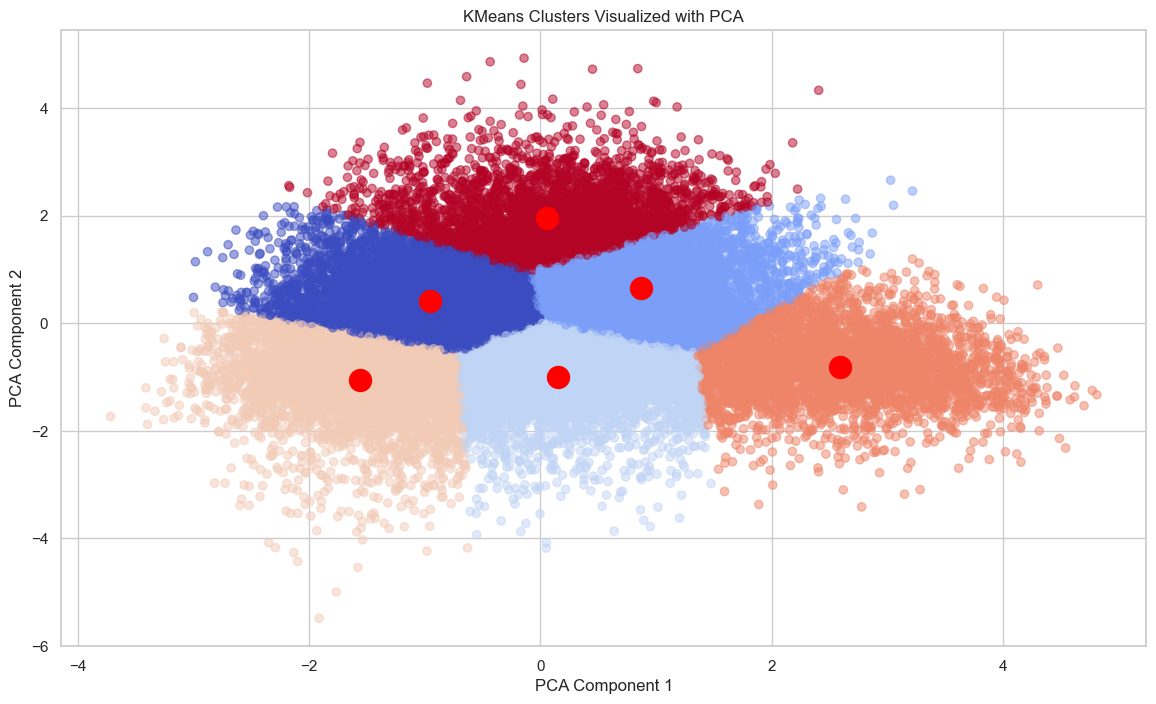

In [330]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)

kmeans_scaled = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "coolwarm", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


- Each dot represents a song, projected onto 2 principal components. These are the two new "summary" features created by PCA that capture the most variance with the 17 features we have within the data set. 
- Color coded regions show the different clusters discovered by KMeans. Each song has been assigned to one of the clusters based on similarity in PCA space. 
-  The red circles mark the centroids of each cluster - the center point of each group 
- Futhermore we can look into each cluster to see how there were grouped by (group by similar features, genere etc. )

In [357]:
#We are adding a Cluster column to are cleaned data set, using the scaled data KMeans with scaled data that was visualized with PCA
kmeans_scaled = KMeans(n_clusters=6 , random_state= 42 )
df['Cluster'] = kmeans_scaled.fit_predict(X_pca)

In [358]:
#Load Back in raw data set , apply so categorical columns to the clean data set 
df_raw = pd.read_csv("data/train.csv")

label = df_raw[['genre', 'artist_name','track_name']]

label = pd.concat([label, df], axis=1)

In [372]:
#Showing each cluster 
label[df['Cluster']== 0]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,0
7,pop,johnny mathis,it's not for me to say,1950,21,0.002506,0.002506,0.336056,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.062602,0.002506,1.000000,0
11,pop,the chordettes,carolina moon,1951,38,0.001645,0.001645,0.001645,0.397490,0.001645,...,0.066201,0.001645,0.093699,0.001645,0.417938,0.001645,0.001645,0.001645,0.985714,0
14,pop,les paul,the carioca,1951,60,0.001253,0.001253,0.081360,0.001253,0.001253,...,0.001253,0.001253,0.111922,0.001253,0.270507,0.001253,0.001253,0.049285,0.985714,0
16,pop,les paul,blue skies,1951,43,0.001385,0.001385,0.001385,0.065507,0.001385,...,0.001385,0.001385,0.600633,0.001385,0.249154,0.001385,0.001385,0.063931,0.985714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27951,hip hop,abstract rude,tha edge,2015,51,0.001053,0.001053,0.117051,0.001053,0.001053,...,0.001053,0.001053,0.569206,0.184625,0.034970,0.001053,0.001053,0.001053,0.071429,0
27959,hip hop,ndee naldinho,sem voce eu nao sou nada,2015,47,0.001504,0.001504,0.597263,0.001504,0.001504,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.377173,0.001504,0.071429,0
28003,hip hop,nate dogg,backdoor,2017,50,0.064835,0.001350,0.120630,0.001350,0.001350,...,0.001350,0.001350,0.230745,0.001350,0.001350,0.001350,0.387352,0.001350,0.042857,0
28323,hip hop,young mc,bust a move,2019,10,0.004785,0.004785,0.732057,0.004785,0.004785,...,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.014286,0


In [360]:
label[df['Cluster']== 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
15,pop,les paul,chicken reel,1951,199,0.000349,0.018417,0.391879,0.000349,0.025737,...,0.000349,0.000349,0.000349,0.000349,0.000349,0.000349,0.034922,0.026084,0.985714,1
17,pop,les paul,dark eyes,1951,182,0.000358,0.378119,0.030934,0.000358,0.025127,...,0.019481,0.093725,0.000358,0.135552,0.058951,0.000358,0.066822,0.043335,0.985714,1
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,1
50,pop,harry belafonte,the next big river,1954,112,0.001645,0.375904,0.172299,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.238618,0.001645,0.001645,0.001645,0.001645,0.942857,1
60,pop,bill haley & his comets,two hound dogs,1955,156,0.000612,0.000612,0.000612,0.000612,0.012723,...,0.000612,0.000612,0.358619,0.173299,0.013151,0.000612,0.000612,0.000612,0.928571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28338,hip hop,will smith,men in black,2019,182,0.127080,0.434874,0.174615,0.000537,0.000537,...,0.097766,0.043787,0.000537,0.000537,0.058491,0.000537,0.000537,0.016203,0.014286,1
28342,hip hop,mos def,"sex, love & money",2019,77,0.001144,0.115676,0.001144,0.141199,0.001144,...,0.068912,0.392885,0.001144,0.001144,0.118549,0.001144,0.001144,0.001144,0.014286,1
28348,hip hop,q-tip,life is better,2019,36,0.001645,0.001645,0.440262,0.001645,0.001645,...,0.001645,0.205476,0.001645,0.001645,0.001645,0.001645,0.118270,0.049952,0.014286,1
28350,hip hop,nappy roots,blowin' trees,2019,74,0.001196,0.125810,0.353286,0.001196,0.001196,...,0.001196,0.040241,0.153930,0.207573,0.001196,0.001196,0.001196,0.001196,0.014286,1


In [373]:
label[df['Cluster']== 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,1.000000,2
19,pop,asha bhosle,awaz deta hai sola ka din,1952,148,0.000431,0.031304,0.000431,0.000431,0.016906,...,0.000431,0.055847,0.072209,0.000431,0.000431,0.000431,0.000431,0.426457,0.971429,2
33,pop,mukesh,raat andheri door savera,1953,83,0.000752,0.000752,0.414772,0.000752,0.204940,...,0.095277,0.000752,0.000752,0.108254,0.037576,0.000752,0.000752,0.099135,0.957143,2
38,pop,talat mahmood,ansoo to nahin hai ankhon men,1953,104,0.265570,0.000537,0.000537,0.042249,0.048934,...,0.000537,0.414400,0.000537,0.094683,0.033427,0.000537,0.000537,0.000537,0.957143,2
52,pop,a. m. rajah,gopiparivrito,1954,73,0.167089,0.219531,0.067068,0.000993,0.000993,...,0.075848,0.328817,0.000993,0.000993,0.000993,0.000993,0.000993,0.000993,0.942857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,hip hop,snoop dogg,this weed iz mine,2018,57,0.001815,0.001815,0.001815,0.059982,0.001815,...,0.001815,0.371399,0.114192,0.001815,0.066266,0.001815,0.001815,0.127656,0.028571,2
28196,hip hop,arrested development,mr. wendal,2018,39,0.001754,0.001754,0.001754,0.001754,0.001754,...,0.376132,0.448250,0.001754,0.001754,0.035739,0.001754,0.001754,0.001754,0.028571,2
28208,hip hop,shah rule,lakhs,2018,35,0.003096,0.003096,0.003096,0.003096,0.003096,...,0.142009,0.387687,0.003096,0.003096,0.003096,0.003096,0.003096,0.122669,0.028571,2
28276,hip hop,nappy roots,slums,2019,61,0.068976,0.001815,0.001815,0.001815,0.001815,...,0.282975,0.357377,0.001815,0.001815,0.001815,0.038059,0.001815,0.075746,0.014286,2


In [362]:
label[df['Cluster']== 3]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,3
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,3
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,3
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,3
8,pop,stélios kazantzídis,klapse me mana klapse me,1950,30,0.083537,0.002024,0.002024,0.248273,0.002024,...,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27429,rock,goth babe,weekend friend,2019,9,0.005263,0.005263,0.005263,0.301001,0.005263,...,0.077478,0.005263,0.005263,0.005263,0.005263,0.005263,0.005263,0.005263,0.014286,3
27443,rock,weezer,take on me,2019,34,0.041236,0.001754,0.257433,0.001754,0.001754,...,0.230808,0.001754,0.001754,0.001754,0.001754,0.001754,0.325383,0.120578,0.014286,3
27453,rock,the cure,in between days (45 version),2019,43,0.282232,0.001253,0.001253,0.001253,0.001253,...,0.195062,0.001253,0.001253,0.001253,0.001253,0.001253,0.488895,0.001253,0.014286,3
27790,hip hop,night shield,"monsters (cruelty 5) (feat. frank waln, young ...",2012,22,0.002288,0.002288,0.002288,0.110016,0.002288,...,0.181793,0.002288,0.119344,0.002288,0.002288,0.002288,0.041195,0.192486,0.114286,3


In [363]:
label[df['Cluster']== 4]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
10,pop,liva weel,"drømmer man om den, vågner..",1951,113,0.017090,0.026486,0.000774,0.000774,0.000774,...,0.079665,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,0.985714,4
12,pop,frankie laine,necessary evil,1951,173,0.000627,0.244358,0.083570,0.000627,0.013375,...,0.109129,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,0.985714,4
27,pop,asha bhosle,gullyachi shapath,1952,127,0.000693,0.040706,0.000693,0.028726,0.000693,...,0.000693,0.688167,0.000693,0.064938,0.122569,0.000693,0.000693,0.000693,0.971429,4
64,pop,ted heath,believe in me,1956,121,0.057984,0.000578,0.000578,0.000578,0.024864,...,0.141719,0.588776,0.000578,0.000578,0.141685,0.000578,0.000578,0.000578,0.914286,4
65,pop,ted heath,take the “a” train,1956,199,0.000516,0.000516,0.000516,0.000516,0.000516,...,0.136611,0.304397,0.020922,0.483828,0.000516,0.000516,0.000516,0.000516,0.914286,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,4
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,4
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,4
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,4


In [364]:
label[df['Cluster']== 5]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
5,pop,perry como,round and round (with mitchell ayres and his o...,1950,98,0.001053,0.420685,0.001053,0.074078,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.128292,0.001053,1.000000,5
30,pop,lata mangeshkar,chupke chupke (from ''paying guest''),1953,32,0.004049,0.383725,0.055999,0.004049,0.004049,...,0.235733,0.004049,0.004049,0.004049,0.004049,0.263814,0.004049,0.004049,0.957143,5
41,pop,lata mangeshkar,le chal ri nindiya le chal hamen,1954,64,0.005848,0.764423,0.005848,0.005848,0.005848,...,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.136161,0.005848,0.942857,5
51,pop,lata mangeshkar,sitaron ki mehfil saji,1954,52,0.001350,0.477499,0.102284,0.001350,0.114165,...,0.001350,0.001350,0.001350,0.001350,0.233260,0.001350,0.001350,0.027284,0.942857,5
63,pop,ted heath,to you my love,1955,135,0.000566,0.321891,0.000566,0.078896,0.000566,...,0.124450,0.000566,0.070581,0.000566,0.232538,0.017532,0.000566,0.027779,0.928571,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28167,hip hop,talib kweli,ny weather report,2018,103,0.000774,0.327265,0.033128,0.000774,0.025469,...,0.000774,0.053441,0.107520,0.195229,0.071530,0.140322,0.000774,0.000774,0.028571,5
28183,hip hop,kid frost,la raza,2018,45,0.002924,0.317707,0.002924,0.051202,0.002924,...,0.002924,0.002924,0.002924,0.145682,0.002924,0.077842,0.138057,0.002924,0.028571,5
28273,hip hop,brand nubian,love vs. hate,2019,91,0.001053,0.355978,0.001053,0.050692,0.001053,...,0.238445,0.001053,0.052523,0.001053,0.001053,0.214589,0.001053,0.001053,0.014286,5
28283,hip hop,oscar lee,méxico ácido,2019,38,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.002392,0.142371,0.414603,0.002392,0.404749,0.002392,0.014286,5
